In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [78]:
data=pd.read_csv("lung-cancer.csv",names=range(1,58))
data

,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,57
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2
5,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
6,1,0,3,2,1,0,3,3,3,1,...,2,2,2,2,1,2,2,2,1,2
7,1,0,2,2,1,0,3,1,3,3,...,2,2,1,2,2,2,2,1,2,2
8,1,0,3,1,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
9,2,0,2,3,2,0,2,2,2,1,...,2,2,2,1,3,2,1,1,2,2


# Data Exploration

In [79]:
#Renameing the columns
data=data.rename(columns = {1:'class'})

In [80]:
data

,class,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,57
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2
5,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
6,1,0,3,2,1,0,3,3,3,1,...,2,2,2,2,1,2,2,2,1,2
7,1,0,2,2,1,0,3,1,3,3,...,2,2,1,2,2,2,2,1,2,2
8,1,0,3,1,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
9,2,0,2,3,2,0,2,2,2,1,...,2,2,2,1,3,2,1,1,2,2


In [81]:
data.columns

Index(['class',       2,       3,       4,       5,       6,       7,       8,
             9,      10,      11,      12,      13,      14,      15,      16,
            17,      18,      19,      20,      21,      22,      23,      24,
            25,      26,      27,      28,      29,      30,      31,      32,
            33,      34,      35,      36,      37,      38,      39,      40,
            41,      42,      43,      44,      45,      46,      47,      48,
            49,      50,      51,      52,      53,      54,      55,      56,
            57],
      dtype='object')

In [82]:
data.shape

(32, 57)

In [83]:
data.head()

,class,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,57
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 57 columns):
class    32 non-null int64
2        32 non-null int64
3        32 non-null int64
4        32 non-null int64
5        32 non-null object
6        32 non-null int64
7        32 non-null int64
8        32 non-null int64
9        32 non-null int64
10       32 non-null int64
11       32 non-null int64
12       32 non-null int64
13       32 non-null int64
14       32 non-null int64
15       32 non-null int64
16       32 non-null int64
17       32 non-null int64
18       32 non-null int64
19       32 non-null int64
20       32 non-null int64
21       32 non-null int64
22       32 non-null int64
23       32 non-null int64
24       32 non-null int64
25       32 non-null int64
26       32 non-null int64
27       32 non-null int64
28       32 non-null int64
29       32 non-null int64
30       32 non-null int64
31       32 non-null int64
32       32 non-null int64
33       32 non-null int64
34   

In [85]:
data.dtypes

class     int64
2         int64
3         int64
4         int64
5        object
6         int64
7         int64
8         int64
9         int64
10        int64
11        int64
12        int64
13        int64
14        int64
15        int64
16        int64
17        int64
18        int64
19        int64
20        int64
21        int64
22        int64
23        int64
24        int64
25        int64
26        int64
27        int64
28        int64
29        int64
30        int64
31        int64
32        int64
33        int64
34        int64
35        int64
36        int64
37        int64
38        int64
39       object
40        int64
41        int64
42        int64
43        int64
44        int64
45        int64
46        int64
47        int64
48        int64
49        int64
50        int64
51        int64
52        int64
53        int64
54        int64
55        int64
56        int64
57        int64
dtype: object

In [86]:
#converting categorical value intonumerical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data[5]=le.fit_transform(data[5])
data[39]=le.fit_transform(data[39])

In [87]:
#cross check
data.dtypes

class    int64
2        int64
3        int64
4        int64
5        int32
6        int64
7        int64
8        int64
9        int64
10       int64
11       int64
12       int64
13       int64
14       int64
15       int64
16       int64
17       int64
18       int64
19       int64
20       int64
21       int64
22       int64
23       int64
24       int64
25       int64
26       int64
27       int64
28       int64
29       int64
30       int64
31       int64
32       int64
33       int64
34       int64
35       int64
36       int64
37       int64
38       int64
39       int32
40       int64
41       int64
42       int64
43       int64
44       int64
45       int64
46       int64
47       int64
48       int64
49       int64
50       int64
51       int64
52       int64
53       int64
54       int64
55       int64
56       int64
57       int64
dtype: object

Here we can see there isno categorical value present in the data.

In [88]:
data.isnull().sum()

class    0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
dtype: int64

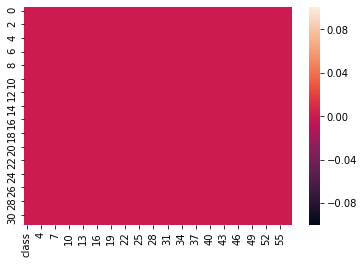

In [89]:
sns.heatmap(data.isnull())

No null value present in the data.

In [90]:
#counting target variables
from collections import Counter
Counter(data['class'])

Counter({1: 9, 2: 13, 3: 10})

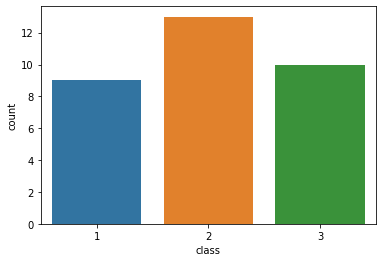

In [91]:
#plotting target variables
sns.countplot(x='class',data=data)

In [92]:
data.shape

(32, 57)

In [93]:
x=data.drop('class',axis=1)
y=data['class']

In [94]:
x.shape,y.shape

((32, 56), (32,))

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [105]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
x = mx.fit_transform(x)

In [106]:
#Train and Test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [107]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 56)
(8, 56)
(24,)
(8,)


In [121]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

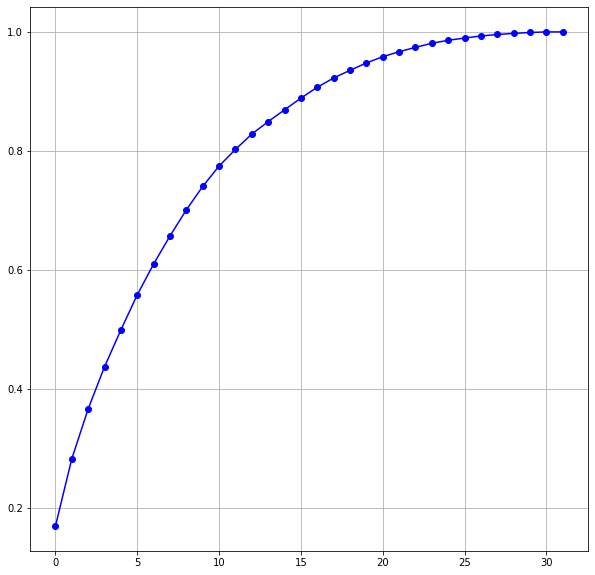

In [122]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.grid()

In [123]:
pca=PCA(n_components=10)
x=pca.fit_transform(x)

In [124]:
#Implementation of ml models by creating a function
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
models = []
models.append(('lg', LogisticRegression()))
models.append(('knn', KNeighborsClassifier()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('gnb', GaussianNB()))
models.append(('rfc',RandomForestClassifier()))

In [125]:
def my_model(models):
    models.fit(x_train,y_train)
    pred=models.predict(x_test)
    print(accuracy_score(y_test,pred)*100)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [126]:
my_model(lg)

75.0
[[1 0 0]
 [1 2 0]
 [0 1 3]]
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.67      0.67      0.67         3
           3       1.00      0.75      0.86         4

    accuracy                           0.75         8
   macro avg       0.72      0.81      0.73         8
weighted avg       0.81      0.75      0.76         8



In [132]:
my_model(dtc)

37.5
[[1 0 0]
 [0 0 3]
 [0 2 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         3
           3       0.40      0.50      0.44         4

    accuracy                           0.38         8
   macro avg       0.47      0.50      0.48         8
weighted avg       0.33      0.38      0.35         8



In [134]:
my_model(knn)

25.0
[[1 0 0]
 [3 0 0]
 [0 3 1]]
              precision    recall  f1-score   support

           1       0.25      1.00      0.40         1
           2       0.00      0.00      0.00         3
           3       1.00      0.25      0.40         4

    accuracy                           0.25         8
   macro avg       0.42      0.42      0.27         8
weighted avg       0.53      0.25      0.25         8



In [129]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [130]:
svmkernel('rbf')

0.375
[[0 1 0]
 [0 3 0]
 [0 4 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.38      1.00      0.55         3
           3       0.00      0.00      0.00         4

    accuracy                           0.38         8
   macro avg       0.12      0.33      0.18         8
weighted avg       0.14      0.38      0.20         8



In [131]:
svmkernel('poly')

0.375
[[0 1 0]
 [0 3 0]
 [0 4 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.38      1.00      0.55         3
           3       0.00      0.00      0.00         4

    accuracy                           0.38         8
   macro avg       0.12      0.33      0.18         8
weighted avg       0.14      0.38      0.20         8



Apart from 'logistic regression' model,there is no any model performs well.so to increase the accuracy of the model we are going to use boosting and hyper parameter tunning. 

# Boosting

In [135]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

In [136]:
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=lg,learning_rate=1)

In [137]:
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

In [138]:
#Predict the response for test dataset
y_pred = model.predict(x_test)

In [139]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


# Grid Search CV

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
clf =  GridSearchCV(lg,{'C': [1,10,20]},cv=10, return_train_score=False)
clf.fit(x,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [168]:
accuracy = clf.best_score_

In [169]:
accuracy

0.5625

In [170]:
clf.best_params_

{'C': 1}

In [175]:
lg=LogisticRegression()
lg.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
# Predicting the Test set results
y_pred = lg.predict(x_test)

In [180]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0 0]
 [1 2 0]
 [0 1 3]]


In [178]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [179]:

accuracy

0.75

After  the application of boosting and grid search cv we found that both are giving the same accuracy.

In [181]:
from sklearn.externals import joblib
#saving the model as pickl
joblib.dump(lg,"Project 39_lung cancer.pkl")

['Project 39_lung cancer.pkl']

In [183]:
x= joblib.load('Project 39_lung cancer.pkl')

In [184]:
x.predict(x_test)

array([3, 2, 3, 1, 1, 2, 2, 3], dtype=int64)